<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/machinelearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install palmerpenguins
#install.packages("palmerpenguins")

In [10]:
#6-Acesse a base de dados "Pinguins" disponível em PalmerPenguins GitHub. Identifique as 'features' e o 'target' na base de dados.

In [11]:
import pandas as pd
from palmerpenguins import load_penguins

#carregar a base de dados pinguins
penguins = load_penguins()
#apagar o q tiver NaN, limpar
penguins = penguins.dropna()

#mostrar 5 linhas
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [12]:
#7- Com a base de dados "Pinguins", escreva um código em Python para separar os dados
#em conjuntos de treino e validação. Observe que iremos criar um classificador que
#diferencia a espécie "Adelie" das outras duas.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# remover importancia da coluna sexo e ano
penguins = penguins.drop(columns=["sex", "year"])

penguins['e_adelie'] = np.where(penguins['species'] == 'Adelie', 1, 0)  #penguins['e_adelie'] = (penguins['species'] == 'Adelie').astype(int)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # feature: caracteristicas dos pinguins
y = penguins['e_adelie'] #target: oq precisa ser previsto

#treinamento
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("conjunto de treino:", np.bincount(y_treino))
print("conjunto de validacao:", np.bincount(y_validacao))




conjunto de treino: [131 102]
conjunto de validacao: [56 44]


In [14]:
#8

acuracia do modelo: 0.99
relatorio de classificacao:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      0.94      0.97        34
           2       1.00      1.00      1.00        60

    accuracy                           0.99       167
   macro avg       0.99      0.98      0.99       167
weighted avg       0.99      0.99      0.99       167

matriz de confusao:
[[73  0  0]
 [ 2 32  0]
 [ 0  0 60]]
Acuracia media (Multiclasse): 0.7901 ± 0.0628


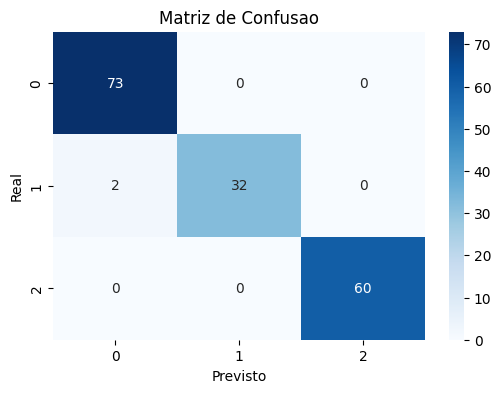

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np


especie = {
    "Adelie": 0,
    "Chinstrap": 1,
    "Gentoo": 2,
}

# mapeando coluna das especies para numeros
penguins['species_n'] = penguins['species'].map(especie).fillna(3)

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species_n']

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# normalizar dados
scaler = StandardScaler()
X_treino_dimensionado = scaler.fit_transform(X_treino)  # Ajusta e transforma treino
X_validacao_dimensionada = scaler.transform(X_validacao)  # Apenas transforma validação

#iniciaar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

#treinar o modelo
knn.fit(X_treino_dimensionado, y_treino)
# Fazer previsoes
y_predicao = knn.predict(X_validacao_dimensionada)

#calcular a acuracia
acuracia = accuracy_score(y_validacao, y_predicao)
print(f"acuracia do modelo: {acuracia:.2f}")

# exibir relatorio de classificacao
print("relatorio de classificacao:")
print(classification_report(y_validacao, y_predicao))

# Exibir matriz de confusao
print("matriz de confusao:")
print(confusion_matrix(y_validacao, y_predicao))


scores_multiclass = cross_val_score(knn, X, penguins['species_n'], cv=5)
print(f"Acuracia media (Multiclasse): {np.mean(scores_multiclass):.4f} ± {np.std(scores_multiclass):.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_validacao, y_predicao), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusao")
plt.show()

In [16]:
#9

In [17]:
acuracia = accuracy_score(y_validacao, y_predicao)
print(f"Acuracia: {acuracia}")
print("Relatorio de Classificacao:")
print(classification_report(y_validacao, y_predicao))


Acuracia: 0.9880239520958084
Relatorio de Classificacao:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      0.94      0.97        34
           2       1.00      1.00      1.00        60

    accuracy                           0.99       167
   macro avg       0.99      0.98      0.99       167
weighted avg       0.99      0.99      0.99       167



Acuracia do Gentoo vs. outras especies: 1.00
Relatorio de Classificacao:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        60

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



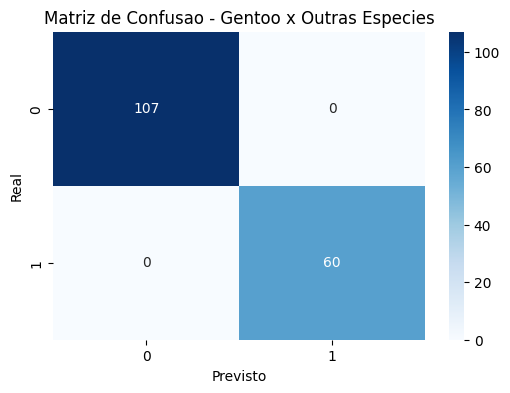

Acurácia média (Binário): 0.9281 ± 0.0393


In [18]:
penguins['e_gentoo'] = np.where(penguins['species'] == 'Gentoo', 1, 0)

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['e_gentoo']

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

scaler = StandardScaler()
X_treino_dimensionado = scaler.fit_transform(X_treino)
X_validacao_dimensionada = scaler.transform(X_validacao)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino_dimensionado, y_treino)

y_predicao = knn.predict(X_validacao_dimensionada)

acuracia_gentoo = accuracy_score(y_validacao, y_predicao)
print(f"Acuracia do Gentoo vs. outras especies: {acuracia_gentoo:.2f}")

print("Relatorio de Classificacao:")
print(classification_report(y_validacao, y_predicao))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_validacao, y_predicao), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusao - Gentoo x Outras Especies")
plt.show()


from sklearn.model_selection import cross_val_score
import numpy as np

# Supondo que temos os modelos treinados: model_multiclass e model_binary
scores_binary = cross_val_score(knn, X, penguins['e_gentoo'], cv=5)

print(f"Acurácia média (Binário): {np.mean(scores_binary):.4f} ± {np.std(scores_binary):.4f}")


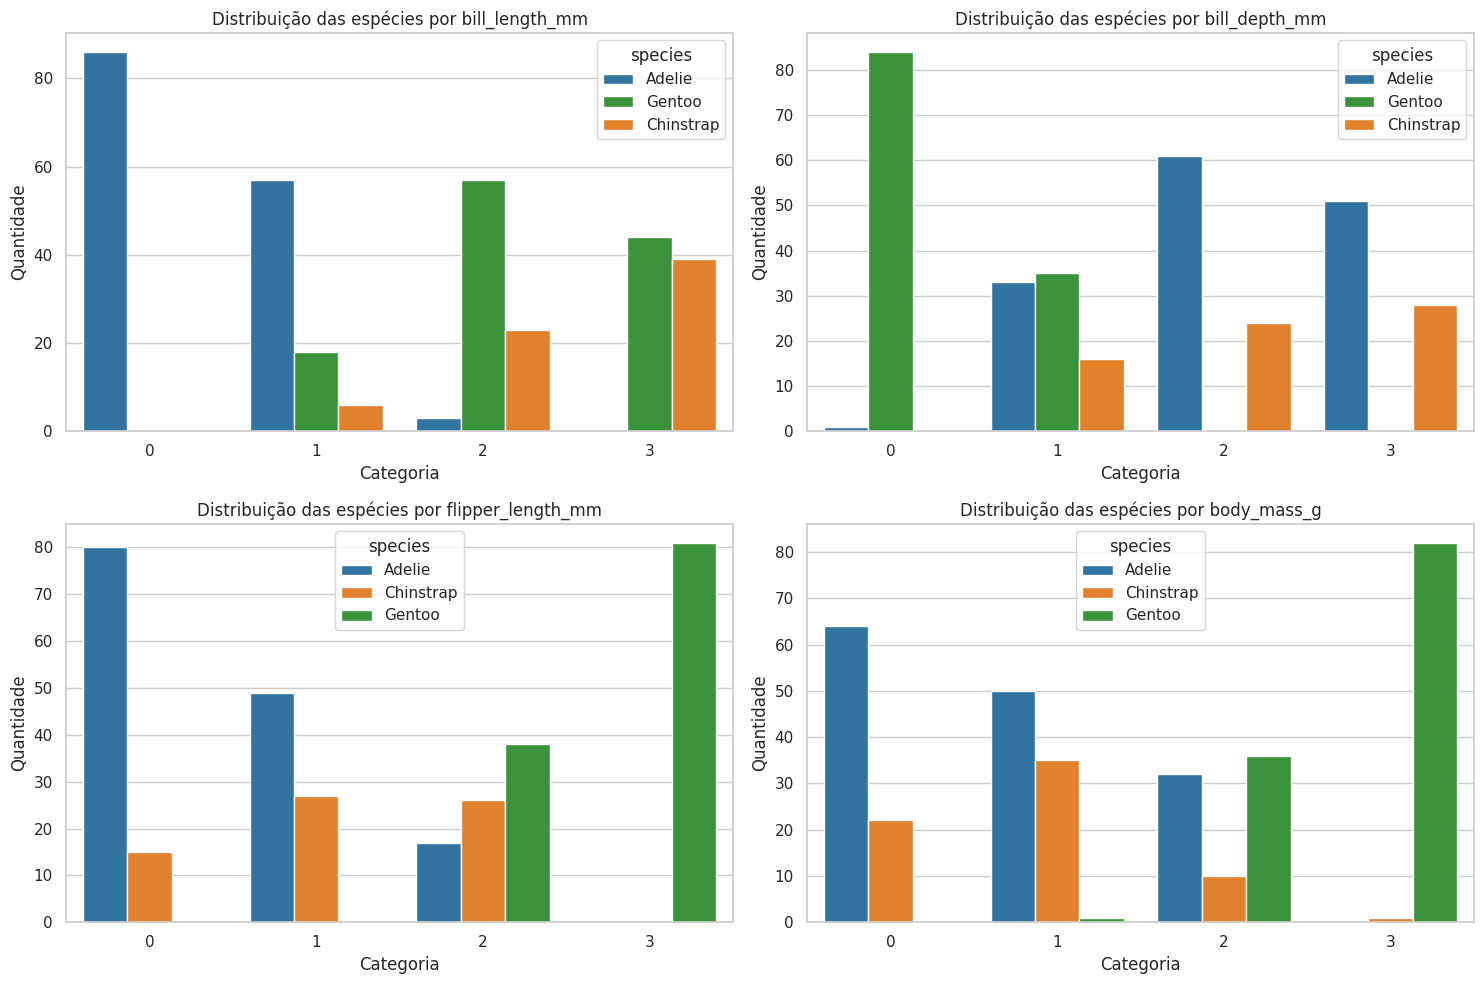

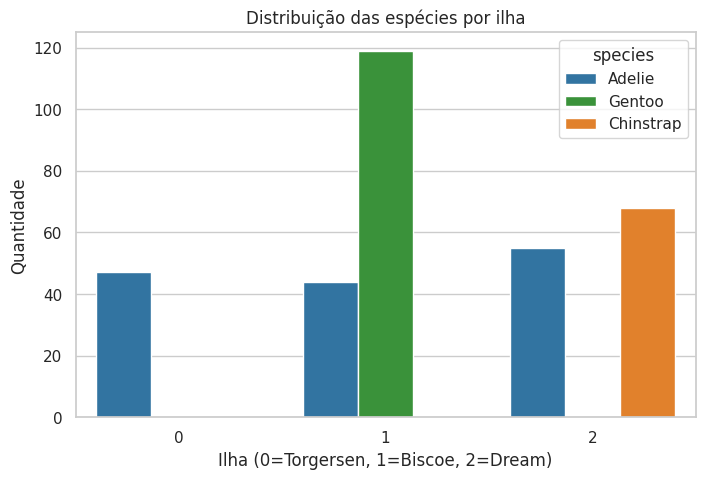

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

# Carregar a base de dados dos pinguins
penguins = load_penguins()
penguins = penguins.dropna()
# remover importancia da coluna sexo e ano
penguins = penguins.drop(columns=["sex", "year"])
# Mapear ilhas para valores numéricos
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
penguins['island_num'] = penguins['island'].map(island_mapping)

# Definir categorias para cada característica
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
num_categories = 4

# Criar categorias para cada feature
for feature in features:
    penguins[f'{feature}_cat'] = pd.qcut(penguins[feature], num_categories, labels=False)

# Definir paleta de cores personalizada para as espécies
species_palette = {'Adelie': '#1f77b4', 'Chinstrap': '#ff7f0e', 'Gentoo': '#2ca02c'}

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar gráficos de barras para cada característica
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.countplot(data=penguins, x=f'{feature}_cat', hue='species', palette=species_palette, ax=ax)
    ax.set_title(f'Distribuição das espécies por {feature}')
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

# Criar gráfico de barras para a distribuição das espécies por ilha
plt.figure(figsize=(8, 5))
sns.countplot(data=penguins, x='island_num', hue='species', palette=species_palette)
plt.title('Distribuição das espécies por ilha')
plt.xlabel('Ilha (0=Torgersen, 1=Biscoe, 2=Dream)')
plt.ylabel('Quantidade')
plt.show()
